In [1]:
#import libraries
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
unique_vals = df['sex'].value_counts()
print(unique_vals) 

male      676
female    662
Name: sex, dtype: int64


### lable encoding

In [11]:
df['sex'].replace({'female':0,
                   'male':1},inplace = True)

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
df['smoker'].replace({'no':0,
                      'yes':1},inplace=True)

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### one hot encoding

In [16]:
df = pd.get_dummies(df,columns=['region'])

In [17]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


<Axes: >

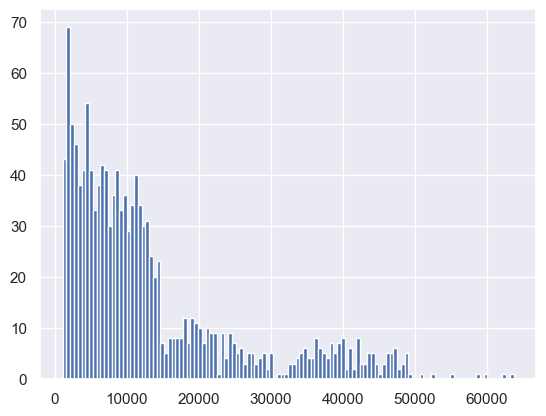

In [19]:
df.charges.hist(bins=120)

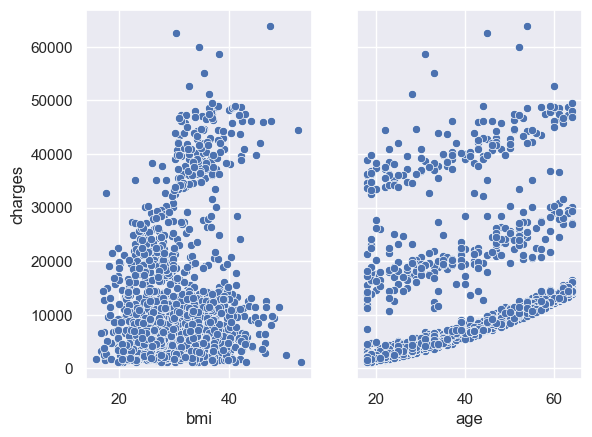

In [20]:
fig, axes = plt.subplots(1, 2, sharey=True)

plot_bmi = sns.scatterplot(y = 'charges', x = 'bmi', data=df, ax = axes[0])
plot_age = sns.scatterplot(y = 'charges', x = 'age', data=df, ax = axes[1])
plt.show()

In [23]:
def mean_and_sd(indep_var):
    val1 = df[indep_var].unique()[0]
    val2 = df[indep_var].unique()[1]
    var1 = df[df[indep_var] == val1]['charges']
    mean1 = round(var1.mean(),2)
    var2 = df[df[indep_var] == val2]['charges']
    mean2 = round(var2.mean(),2)
    print('{} mean - {} mean = {}'.format(val1,val2,mean1 - mean2))
    #Standard Deviation
    sd1 = np.std(df[df[indep_var] == val1]['charges'])
    sd2 = np.std(df[df[indep_var] == val2]['charges'])
    print('sd of {} is {}, and of {} is {}'.format(val1,round(sd1),val2,round(sd2)))

In [24]:
mean_and_sd('sex')

0 mean - 1 mean = -1387.17
sd of 0 is 11120, and of 1 is 12961


In [25]:
mean_and_sd('smoker')

1 mean - 0 mean = 23615.96
sd of 1 is 11520, and of 0 is 5991


In [26]:
df.head(7)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0


In [27]:
#train-test split
from sklearn.model_selection import train_test_split
x = df.drop('charges',axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [28]:
print((x_train.shape,x_test.shape,y_train.shape,y_test.shape))

((1003, 9), (335, 9), (1003,), (335,))


In [30]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.coef_)

[  259.96359057  -370.117214     331.68416785   599.08932264
 23890.56770057   413.11837559   447.8982525   -424.03496794
  -436.98166015]


In [31]:
mse = mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

MSE is:  34508625.17969857


In [32]:
rmse = np.sqrt(mse)
print('RMSE is: ',rmse)

RMSE is:  5874.404240405879


In [34]:
mae = mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

MAE is:  3985.7358325093005


In [35]:
r2 = r2_score(y_test,y_pred)
print('R2 score is: ',r2)

R2 score is:  0.7614287237353058


# Training

In [38]:
y_pred_train = model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)


rmse = np.sqrt(mse)
print('RMSE is: ',rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)


r2 = r2_score(y_train,y_pred_train)
print('R2 score is: ',r2)

MSE is:  37260476.24036007
MAE is:  4266.2443512033815
RMSE is:  6104.135994582695
MAE is:  4266.2443512033815
R2 score is:  0.7463560813025463


In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred,y_test)

34508625.17969857

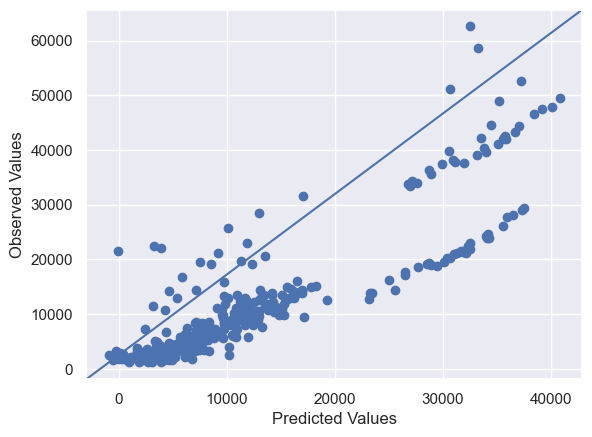

In [40]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")

plt.show()

In [41]:
#model evaluation
r2_lr = r2_score(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
print([r2_lr, mae_lr, mse_lr])

[0.7614287237353058, 3985.7358325093005, 34508625.17969857]


## Testing On Single Row

In [44]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [76]:
age = 35
sex = 'male'
bmi = 27.9
children = 3
smoker = 'yes'
region = 'northeast'

In [77]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### setting values for all columns

In [78]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
lable_encoded_data = {'sex': {'female': 0,'male':1},
                     'smoker':{'no':0,'yes':1}}

In [80]:
region = 'region_' + region
region

'region_northeast'

In [81]:
region_index = np.where(column_names == region)[0][0]
region_index

5

In [82]:
test_array[0] = age
test_array[1] = lable_encoded_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = lable_encoded_data['smoker'][smoker]
test_array[region_index] = 1 

In [83]:
test_array

array([35. ,  1. , 27.9,  3. ,  1. ,  1. ,  0. ,  0. ,  0. ])

In [84]:
model.predict([test_array])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31735.51158314])

In [88]:
import pickle

with open('Linear_model.pkl','wb') as f:
    pickle.dump(model,f)

In [89]:
project_data = {'sex': {'female': 0,'male':1},
                     'smoker':{'no':0,'yes':1},
                     'columns':list(x.columns)}

In [90]:
import json
with open('project_data.json','w') as f:
    json.dump(project_data,f)